# Risk Analysis By Jelly Bean Airlines 

Within this notebook we will clean up the Avaiation Dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. 

We first start by importing and and simply exploring the raw data that was given to us.

In [1]:
#We import all the packages needed.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#We read in the data using Pandas and assigining it to the df variable.
#We change the two columns 'Event.Date' and 'Publication.Date' into date time using the parse_dates parameter.
df = pd.read_csv('./data/Aviation_Data.csv', parse_dates=['Event.Date', 'Publication.Date'], low_memory=False)

#Sam's addition, parsing dates

In [3]:
#We set the display in order for us to see all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [4]:
df.head()
#We noticed that something looks off with event dates because the years are not in range of data set.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [6]:
df.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.000000,81793,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,73659
unique,87951,71,88863,NaN,27758,219,25589,27154,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17006,NaN
top,20001212X19172,Accident,CEN22LA149,NaN,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,NaN
freq,3,85015,2,NaN,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,NaN
mean,NaN,NaN,NaN,1999-09-17 17:13:39.354476032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,2004-05-11 00:50:07.502138112
min,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1980-04-16 00:00:00
25%,NaN,NaN,NaN,1989-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1993-09-14 00:00:00
50%,NaN,NaN,NaN,1998-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,2001-10-23 00:00:00
75%,NaN,NaN,NaN,2009-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,2020-09-25 00:00:00
max,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,2022-12-30 00:00:00


In [7]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
20-08-2021       37
20-09-2021       33
05-05-2021       29
03-12-2020       29
06-05-2021       24
24-08-2021       22
14-06-2022       21
19-11-2020       20
28-01-2021       18
27-05-2021       18
19-10-2021       17
13-10-2022       17
16-11-2021       15
24-06-2021       15
01-07-2022       14
06-10-2022       14
01-11-2022       14
17-12-2021       13
26-08-2021       13
05-07-2022       13
08-09-2022       13
22-09-2022       13
13-07-2022       13
20-10-2021       12
25-05-2021       11
12-08-2022       10
16-07-2021       10
15-07-2021       10
10-06-2021       10
01-09-2022       10
15-10-2021        9
22-09-2021        8
29-01-2021        8
22-06-2022        8
29-09-2021        8
20-05-2021        8
20-07-2022        8
14-12-2021        8
23-09-2022        8
02-12-2022        8
31-08-2021        7
01-06-2021        7
13-12-2021        6
08-06-2021        6
2

In [8]:
df['Purpose.of.flight'].value_counts()
#We came to realization that this column should be filtered into values for private vs commercial

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [9]:
df['Air.carrier'].value_counts()

Air.carrier
Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: count, Length: 13590, dtype: int64

In [10]:
df['Location'].value_counts()
#We noticed that we should filter this column for country and state using .str.split()

Location
ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
Corona De Tucso, AZ      1
Lithonia, GA             1
BONANZA, OR              1
NEWPORT, PA              1
Brasnorte,               1
Name: count, Length: 27758, dtype: int64

In [11]:
df['Total.Uninjured'].value_counts()

Total.Uninjured
0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
5.0        887
6.0        500
7.0        281
8.0        163
9.0        128
10.0       108
11.0        63
12.0        52
13.0        45
16.0        40
15.0        37
14.0        36
17.0        33
18.0        31
53.0        31
19.0        28
20.0        26
51.0        23
21.0        22
44.0        21
37.0        21
131.0       21
147.0       20
133.0       20
140.0       20
52.0        19
99.0        19
45.0        18
50.0        18
132.0       18
32.0        18
102.0       18
39.0        17
36.0        17
26.0        17
33.0        17
25.0        17
185.0       17
111.0       17
84.0        17
40.0        17
144.0       17
141.0       16
59.0        16
71.0        16
41.0        16
146.0       16
28.0        16
142.0       16
112.0       16
145.0       16
73.0        16
121.0       16
22.0        16
106.0       16
31.0        15
58.0        15
108.0       15
150.0       15
95.0        15
136.0    

# Start of Filtering

We want to string split so that we can lump by states and countries

In [12]:
df['Location_City'] = df['Location'].str.split(", ").str[0].str.upper()
df['Location_State_Country'] = df['Location'].str.split(", ").str[1].str.upper()
df['Location_State_Country'].value_counts().head()

Location_State_Country
CA    8857
TX    5913
FL    5825
AK    5672
AZ    2834
Name: count, dtype: int64

In [13]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,SALTVILLE,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,CANTON,OH


After investigating the 'Investigation.Type' column, we have identified there should be only 2 categories ("Accident vs. Incident"), summing to a total of 88,889 rows vs. the total 90,348. We have looked at '25-09-2020', '26-09-2020', and '02-02-2021', all of which show rows consisting of null values. We need to filter out the dataset to show only those 2 categories.

In [14]:
#We filtered the column to show just the dates '25-09-20202','26-09-2020', and '02-02-2021'. 
#We noticed they all have NaN values.
df[df['Investigation.Type'] ==  '02-02-2021'].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
75894,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78228,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78351,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78499,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78513,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [15]:
#We filtered for only 'Accident' and 'Incident' in that column and renamed it into the new dataframe. 
df = df[(df['Investigation.Type'] == 'Accident') | (df['Investigation.Type'] == 'Incident')]

In [16]:
#We checked to see if df was filtered down to just Accidents and Incidents.
df['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

Next we want to investigate the date range earlier than 1962 because it seems like there are dates before this year.

In [17]:
#We filtered to look at all the data before 1962.
df[(df['Event.Date'] < '1962-01-01')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,MOOSE CREEK,ID


There seems to be only one date before 1962. We should be able to throw out. However, the Aviation Accident Database provides this acknowledgement.

"Generally, a preliminary report is available online within a few days of an accident. Factual information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. Full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility."

In [18]:
#We narrow the scope of our data to 1993 and after to start with data with full narrative descriptions

df = df[(df['Event.Date'] >= '1993-01-01')]

In [19]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
32026,20001211X11729,Accident,MIA93FA041,1993-01-01,"LILLIAN, AL",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N72088,Luscombe,8A,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,1.0,0.0,1.0,0.0,VMC,Approach,Probable Cause,1993-11-15,LILLIAN,AL
32027,20001211X11711,Accident,LAX93LA087,1993-01-01,"FOLSOM, CA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,NaN,N7462F,Hughes,269C,No,1.0,Reciprocating,NaN,NaN,Other Work Use,NaN,0.0,1.0,0.0,0.0,VMC,Maneuvering,Probable Cause,1993-10-13,FOLSOM,CA
32028,20001211X11645,Accident,ATL93LA045,1993-01-01,"FUQUAY-VARINA, NC",United States,NaN,NaN,5W5,TRIPLE W AIRPARK,Non-Fatal,Destroyed,NaN,N714XN,Cessna,152,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,1.0,0.0,VMC,Approach,Probable Cause,1993-10-25,FUQUAY-VARINA,NC
32029,20001211X11732,Accident,MIA93LA042,1993-01-01,"TITUSVILLE, FL",United States,NaN,NaN,TIX,SPACE CENTER EXECUTIVE,Non-Fatal,Substantial,NaN,N82542,Piper,PA-32R-301,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,1.0,1.0,VMC,Approach,Probable Cause,1994-02-10,TITUSVILLE,FL
32030,20001211X11647,Accident,ATL93LA048,1993-01-01,"BESSEMER, AL",United States,NaN,NaN,2A3,BESSEMER,Non-Fatal,Substantial,NaN,N4292N,Cessna,120,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1993-11-03,BESSEMER,AL


# Cleaning and Dealing with Missing/Null Values

In [20]:
#We take a look at where the null values are.
#We see that there are alot of missing/null values throughout the data.
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     41
Country                      73
Latitude                  22490
Longitude                 22499
Airport.Code              23560
Airport.Name              22780
Injury.Severity            1000
Aircraft.damage            2498
Aircraft.Category         28248
Registration.Number        1360
Make                         56
Model                        72
Amateur.Built               101
Number.of.Engines          5749
Engine.Type                7092
FAR.Description           28512
Schedule                  49496
Purpose.of.flight          6145
Air.carrier               41966
Total.Fatal.Injuries      11245
Total.Serious.Injuries    12309
Total.Minor.Injuries      11726
Total.Uninjured            5774
Weather.Condition          4489
Broad.phase.of.flight     26851
Report.Status              6384
Publication.Date           2784
Location

In [21]:
# We still have more cleaning up to do. Let's look at the country column
df['Country'].value_counts()

Country
United States                       50738
Brazil                                373
Canada                                350
United Kingdom                        342
Mexico                                334
Australia                             298
France                                233
Spain                                 226
Germany                               211
Colombia                              190
Bahamas                               148
South Africa                          129
Japan                                 121
Venezuela                             119
Italy                                 114
Argentina                             110
Indonesia                             110
India                                  96
Peru                                   93
Russia                                 91
Ireland                                77
China                                  67
Guatemala                              66
Eswatini                  

In [22]:
#Let's look at Weather Conditions
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    48399
IMC     3335
UNK      378
Unk      262
Name: count, dtype: int64

There are 4 weather conditions (https://support.crewlounge.aero/support/solutions/articles/24000034167-difference-between-vfr-ifr-vmc-imc-and-actual-simulated-simulator-time)

VMC - Visual Meteorologic Condition: Visibility and clouds are clear and allow you to fly the aircraft by visual reference
IMC - Instrument Meteorologic Condition: The weather is restricting your visibility, you need aircraft flight instruments to fly safe

UNK and Unk means unknown. We should consolidate this into 1 grouping

In [23]:
#We combine 'Unk' and 'UNK' into one.
df[df['Weather.Condition'] == "Unk"] = "UNK"

In [24]:
#We check the Weather Condition Categories to see the combined data.
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    48399
IMC     3335
UNK      640
Name: count, dtype: int64

Now Let's check for duplicate Accident Numbers

In [25]:
#Total Number of Accident Unfiltered is 56863
len(df['Accident.Number'])

56863

In [26]:
#Check for Duplicates
#We noticed there are alot of 'UNK' in the column.
df['Accident.Number'].value_counts().head()

Accident.Number
UNK           262
WPR22LA143      2
DCA22WA130      2
DCA22LA201      2
GAA22WA241      2
Name: count, dtype: int64

In [27]:
#We take a look at just the 'UNK' throughout the column.
#We see that there is all 'UNK' throughout the entire dataframe.
df[df['Accident.Number'] == 'UNK']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
67173,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
67763,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
68347,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69021,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69509,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69697,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
70003,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71098,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71402,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71461,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK


In [28]:
#We look at the accident number 'ERA22FA318'.
df[df['Accident.Number'] == 'ERA22FA318']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
89593,20220718105496,Accident,ERA22FA318,2022-07-17 00:00:00,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,Fatal,Destroyed,Airplane,N97CX,PIPER,PA 46-350P,No,1.0,NaN,091,NaN,Personal,NaN,4.0,0.0,0.0,0.0,VMC,NaN,NaN,2022-08-05 00:00:00,LAS VEGAS,NV
89594,20220718105496,Accident,ERA22FA318,2022-07-17 00:00:00,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,Fatal,Destroyed,Airplane,N160RA,CESSNA,172N,No,1.0,NaN,091,NaN,Instructional,Airwork Las Vegas,4.0,0.0,0.0,0.0,VMC,NaN,NaN,2022-08-05 00:00:00,LAS VEGAS,NV


In [29]:
#We look at the accident number 'DCA22WA167'.
df[df['Accident.Number'] == 'DCA22WA167']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
88619,20220801105632,Incident,DCA22WA167,2022-01-22 00:00:00,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,NaN,NaN,Airplane,9XR-WH,BOMBARDIER,CL600 2D24,No,NaN,NaN,NUSC,NaN,NaN,RwandAir,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,KIGALI,
88620,20220801105632,Incident,DCA22WA167,2022-01-22 00:00:00,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,NaN,NaN,Airplane,ET-AQN,BOEING,737-800,No,NaN,NaN,NUSC,SCHD,NaN,Ethopian Air,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,KIGALI,


Based on the investigation, we can remove the 'UNK' category in the Accident.Number, then we will need to drop duplicates

In [30]:
#We first drop the UNK category from the column.

df = df[df['Accident.Number'] != 'UNK']

In [31]:
df['Accident.Number'].value_counts()

Accident.Number
CEN22FA424    2
DCA22WA172    2
WPR23LA041    2
DCA22WA130    2
WPR22FA309    2
             ..
LAX01LA224    1
FTW01LA206    1
CHI01LA191    1
ATL01LA069    1
ERA23LA097    1
Name: count, Length: 56575, dtype: int64

In [32]:
#Next we drop the duplicates
df = df.drop_duplicates(subset=['Accident.Number'])

In [33]:
df['Accident.Number'].value_counts()

Accident.Number
MIA93FA041    1
ERA11CA226    1
WPR11LA179    1
WPR11LA180    1
WPR11LA181    1
             ..
LAX01LA224    1
FTW01LA206    1
CHI01LA191    1
ATL01LA069    1
ERA23LA097    1
Name: count, Length: 56575, dtype: int64

We now look at the other categories.

In [34]:
df['Aircraft.Category'].value_counts()

#From looking at the categories - We can narrow the focus to just Airplane

Aircraft.Category
Airplane             24097
Helicopter            3105
Glider                 453
Balloon                200
Weight-Shift           161
Gyrocraft              158
Powered Parachute       91
Ultralight              29
Unknown                 13
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [35]:
df['Amateur.Built'].value_counts()

#Given that we are addressing commercial and private enterprises, we want to remove Amateur Built Aircrafts

Amateur.Built
No     50266
Yes     6208
Name: count, dtype: int64

We narrow down the dataframe to just 'Airplane' and Not 'Amateur Built'

In [36]:
#We updated the dataframe to only show 'Airplane' and 'No' inside its respective columns.
df = df[(df['Aircraft.Category'] == 'Airplane') & (df['Amateur.Built'] == 'No')]

In [37]:
#Checking Aircraft.Category
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    21115
Name: count, dtype: int64

In [38]:
#Checking Amateur.Built 
df['Amateur.Built'].value_counts()

Amateur.Built
No    21115
Name: count, dtype: int64

We will now look at other categories

In [39]:
df['FAR.Description'].value_counts()

#FAR means Federal Aviation Regulations (https://www.ecfr.gov/current/title-14/chapter-I/subchapter-G)


FAR.Description
091                              13340
Part 91: General Aviation         2459
NUSN                              1069
NUSC                               779
137                                741
121                                602
135                                535
UNK                                221
129                                194
Part 137: Agricultural             150
PUBU                               124
Part 121: Air Carrier              106
Part 135: Air Taxi & Commuter       71
Part 129: Foreign                   71
Non-U.S., Non-Commercial            71
Non-U.S., Commercial                67
091K                                14
Public Use                          12
Unknown                             12
125                                  5
ARMF                                 4
Part 125: 20+ Pax,6000+ lbs          2
Part 91 Subpart K: Fractional        1
107                                  1
Name: count, dtype: int64

List of FAA Acronym List (https://www.proairpilot.com/faa-acronyms-list.html)

FAR means Federal Aviation Regulations (https://www.ecfr.gov/current/title-14/chapter-I/subchapter-G)
- Part 91: General Operating and Flight Rules
- Part 91/Subpart K: Fractional Ownership Operations
- Part 107: Small Unmanned Aircraft Systems
- Part 121: Operating Requirements: Domestic, Flag, and Supplemental Operations (Air Carrier)
- Part 125: Certification and Operations: Aircraft Having a Seating Capacity of 20 or More Passengers or a Maximum Payload Capacity of 6,000 Pounds or More; and Rules Governing Persons on Board Such Aircraft (20+ Pax, 6000+)
- Part 129: Operations: Foreign Air Carriers and Foreign Operators of U.S. - Registered Aircraft Engaged in Common Carriage
- Part 135: Operating Requirements: Commuter and on Demand Operations and Rules Governing Persons on Board Such Aircraft (Air Taxi & Commuter)
- Part 137: Agricultural Aircraft Operations
- Non-U.S., Non-Commercial
- Non-U.S., Commercial
- ARMF
- NUSN
- NUSC
- PUBU
- Public Use
- UNK

This one might be harder to categorize into smaller groups (Hard to understand what some of these acronyms mean)

In [40]:
df['Schedule'].value_counts()

Schedule
SCHD    1311
NSCH    1063
UNK       30
Name: count, dtype: int64

In [41]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     11620
Instructional                 2736
Aerial Application             929
Business                       489
Positioning                    343
Unknown                        332
Aerial Observation             159
Other Work Use                 152
Skydiving                      150
Flight Test                    120
Ferry                          102
Executive/corporate            102
Banner Tow                      89
Public Aircraft - Federal       51
Air Race show                   48
Public Aircraft                 37
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    16
Public Aircraft - Local         12
Air Race/show                    4
ASHO                             4
Air Drop                         3
PUBS                             3
External Load                    1
Name: count, dtype: int64

What some of the Purpose of flights mean (chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ntsb.gov/safety/safety-studies/Documents/SS0101.pdf) or 
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.faa.gov/sites/faa.gov/files/2022GASurvey-Appendix-B-Documents_04DEC2023V1.pdf or chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://ia903102.us.archive.org/17/items/6560171-Survival-Flight-Accident-Report/6560171-Survival-Flight-Accident-Report.pdf:

Purpose of Flight seems like a good category to reclassify in new groupings. Just to clean up the data, it might be worth reclassifying the following to the 15 categories (16 with the Unknown Category) in the Table 4 for Purpose of Flight Categories

Things to change:
- Positioning to "Other"
- Skydiving is under 14 CFR Part 105 Parachuting guidelines, which should be listed under "Other Work Use" (which includes parachuting)
- Flight Test to "Other" (Proficiency Flight is Flight Test)
- Ferry to "Other"
- Banner Tow to "Other Work Use"
- "Public Use": Public Aircraft, Public Aircraft - Federal, Public Aircraft - State, Public Aircraft - Local
- Air Race show & Air Race/show to Air Race
- Glider Tow to "Other Work Use"
- Firefighting to "Other Aerial Application"
- ASHO to "Air Race"
- PUBS to "Public Use"
- Air Drop to "Other Work Use"

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21115 entries, 32592 to 90345
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                21115 non-null  object
 1   Investigation.Type      21115 non-null  object
 2   Accident.Number         21115 non-null  object
 3   Event.Date              21115 non-null  object
 4   Location                21109 non-null  object
 5   Country                 21114 non-null  object
 6   Latitude                18971 non-null  object
 7   Longitude               18965 non-null  object
 8   Airport.Code            13836 non-null  object
 9   Airport.Name            13923 non-null  object
 10  Injury.Severity         20332 non-null  object
 11  Aircraft.damage         19952 non-null  object
 12  Aircraft.Category       21115 non-null  object
 13  Registration.Number     20910 non-null  object
 14  Make                    21112 non-null  object
 15  Mod

Up to this point we have filtered for Investigation.Type, Accident.Number, Event.Date, Location(City,StateCountry), Aircraft.Category, Amateur.Built, and Weather.Condition. 

In [43]:
#We notice that there are alot of 'Fatal()' categories within this column.  
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      16179
Fatal           3499
Minor            145
Serious          107
Incident         104
Fatal(1)          96
Fatal(2)          74
Fatal(3)          26
Fatal(4)          24
Unavailable       16
Fatal(5)          15
Fatal(6)          11
Fatal(7)           6
Fatal(8)           5
Fatal(10)          4
Fatal(13)          2
Fatal(154)         2
Fatal(12)          2
Fatal(65)          1
Fatal(160)         1
Fatal(97)          1
Fatal(113)         1
Fatal(26)          1
Fatal(19)          1
Fatal(9)           1
Fatal(54)          1
Fatal(24)          1
Fatal(125)         1
Fatal(131)         1
Fatal(169)         1
Fatal(18)          1
Fatal(228)         1
Fatal(20)          1
Name: count, dtype: int64

In [44]:
#Lets combine all of the 'Fatal()' into the 'Fatal' category.
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if isinstance(x, str) and 'Fatal(' in x else x)

In [45]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      16179
Fatal           3781
Minor            145
Serious          107
Incident         104
Unavailable       16
Name: count, dtype: int64

In [46]:
df[df['Injury.Severity'] == 'Unavailable']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
41656,20001208X07697,Accident,DCA97WA043,1997-04-27 00:00:00,"JINAN, CHINA",China,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-82,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,JINAN,CHINA
42287,20001208X08352,Accident,DCA97WA054,1997-07-21 00:00:00,"SOUTHERN THAILA, Thailand",Thailand,NaN,NaN,NaN,NaN,Unavailable,Destroyed,Airplane,NaN,Learjet,LR-31,No,NaN,Unknown,Part 129: Foreign,NSCH,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,SOUTHERN THAILA,THAILAND
42847,20001208X08992,Accident,DCA98WA082,1997-10-09 00:00:00,"HARBIN, CHINA",China,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Cessna,650-0220,No,NaN,Unknown,"Non-U.S., Non-Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,HARBIN,CHINA
44014,20001211X10045,Accident,DCA98WA048,1998-05-29 00:00:00,"BOMBAY, INDIA",India,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,B-737-500,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,BOMBAY,INDIA
44608,20001211X10826,Accident,DCA98WA079,1998-08-05 00:00:00,"SEOUL, KOREA, REPUBLIC OF","Korea, Republic Of",NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,747-400,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,IMC,NaN,Foreign,NaT,SEOUL,KOREA
45357,20001211X11538,Accident,DCA99WA020,1998-12-05 00:00:00,"MANILLA, Philippines",Philippines,NaN,NaN,NaN,NaN,Unavailable,NaN,Airplane,NaN,NaN,A330,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,MANILLA,PHILIPPINES
45560,20001204X00045,Accident,DCA99WA035,1999-01-28 00:00:00,"NAPLES, ITALY",Italy,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-82,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,NAPLES,ITALY
45711,20001205X00299,Accident,DCA99WA050,1999-03-04 00:00:00,"BIARRITZ, FRANCE",France,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,737-228,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,IMC,NaN,Foreign,NaT,BIARRITZ,FRANCE
45764,20001205X00297,Accident,DCA99WA048,1999-03-15 00:00:00,"POHANG, KOREA, REPUBLIC OF","Korea, Republic Of",NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-83,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,POHANG,KOREA
45978,20001205X00483,Accident,IAD99WA071,1999-04-24 00:00:00,"Georgetown, Guyana",Guyana,NaN,NaN,NaN,NaN,Unavailable,Destroyed,Airplane,NaN,Cessna,172M,No,NaN,Unknown,"Non-U.S., Non-Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,GEORGETOWN,GUYANA


In [47]:
#lets look that all the countries
df['Country'].value_counts()

Country
United States                  17957
Brazil                           221
United Kingdom                   199
Mexico                           199
Canada                           161
Australia                        149
Spain                            147
France                           130
Germany                          114
Colombia                         107
South Africa                      74
India                             71
Indonesia                         65
Japan                             64
Italy                             57
Argentina                         56
Venezuela                         56
Peru                              55
Ireland                           47
Eswatini                          45
Bahamas                           43
China                             40
Pakistan                          37
Netherlands                       35
Guatemala                         33
Sweden                            32
Russia                        

In [48]:
#We have looked at the different countries throughout the dataframe 'Brazil', 'United Kingdom', 'Mexico', etc.
df[df['Country'] == 'Brazil']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
40824,20001208X06865,Accident,DCA97WA004,1996-10-31 00:00:00,"SAO PAULO, Brazil",Brazil,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,NaN,Fokker,100,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,97.0,4.0,2.0,NaN,VMC,NaN,Foreign,NaT,SAO PAULO,BRAZIL
44286,20001211X10547,Incident,DCA98WA070,1998-07-02 00:00:00,"BRAZIL, Brazil",Brazil,NaN,NaN,NaN,NaN,Incident,NaN,Airplane,NaN,Boeing,737-400,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,5.0,UNK,NaN,Foreign,NaT,BRAZIL,BRAZIL
44359,20001211X10551,Accident,DCA98WA078,1998-07-10 00:00:00,"SAO PAULO, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,NaN,Molino Oy,MU2-2B-25,No,NaN,Unknown,Part 129: Foreign,NSCH,Unknown,NaN,NaN,NaN,NaN,5.0,UNK,NaN,Foreign,NaT,SAO PAULO,BRAZIL
45449,20001211X11543,Incident,DCA99WA027,1998-12-28 00:00:00,"CURITBA, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Incident,Substantial,Airplane,NaN,Embraer,EMB-145,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,40.0,UNK,NaN,Foreign,NaT,CURITBA,BRAZIL
47911,20001212X20476,Accident,DCA00WA029,2000-02-27 00:00:00,"PORTO ALEGRE, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,NaN,Boeing,B737-400,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,123.0,IMC,NaN,Foreign,NaT,PORTO ALEGRE,BRAZIL
61486,20061002X01435,Accident,DCA06RA076B,2006-09-29 00:00:00,"Azevedo, Brazil",Brazil,NaN,NaN,NaN,Cachimbo airbase,Fatal,Minor,Airplane,N600XL,Embraer,E135 Legacy,No,2.0,NaN,Part 91: General Aviation,NaN,Ferry,NaN,154.0,NaN,NaN,7.0,IMC,NaN,Foreign,2010-04-02 00:00:00,AZEVEDO,BRAZIL
61487,20061002X01435,Accident,DCA06RA076A,2006-09-29 00:00:00,"Azevedo, Brazil",Brazil,NaN,NaN,NaN,Cachimbo airbase,Fatal,Destroyed,Airplane,NaN,Boeing,737-800,No,2.0,NaN,"Non-U.S., Commercial",SCHD,NaN,NaN,154.0,NaN,NaN,7.0,IMC,NaN,Foreign,2010-04-02 00:00:00,AZEVEDO,BRAZIL
63861,20080327X00393,Accident,NYC08WA065,2007-12-19 00:00:00,"GURUPI, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Fatal,Substantial,Airplane,NaN,Cirrus,SR22,No,NaN,NaN,"Non-U.S., Non-Commercial",NaN,Unknown,NaN,1.0,1.0,NaN,NaN,NaN,NaN,Foreign,2014-06-20 00:00:00,GURUPI,BRAZIL
64140,20080305X00263,Accident,NYC08WA117,2008-03-02 00:00:00,"Rio de Janiero, Brazil",Brazil,022590S,0043220W,NaN,NaN,Fatal,Destroyed,Airplane,PR-AIO,Cirrus Design Corporation,SR-22,No,NaN,NaN,NUSN,NaN,Unknown,CISA Traitings S.A.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,2020-09-25 00:00:00,RIO DE JANIERO,BRAZIL
64272,20080521X00709,Accident,DCA08WA060,2008-03-31 00:00:00,"Lencois, Bahia, Brazil",Brazil,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,PT-VCI,Neiva,NE-821,No,NaN,NaN,NUSC,SCHD,NaN,Abaeté Táxi Aéreo,2.0,0.0,0.0,0.0,IMC,NaN,NaN,2020-09-25 00:00:00,LENCOIS,BAHIA


After evaluation of the Countries we have determined keeping international countries will be difficult given the limited data we have. As such we are sticking to just the U.S. 

In [49]:
#We filtered the 'Country' column to just show the 'United States'.
df = df[df['Country'] == 'United States']

In [50]:
df['Country'].value_counts()

Country
United States    17957
Name: count, dtype: int64

In [51]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                    135
Longitude                   142
Airport.Code               4832
Airport.Name               4769
Injury.Severity              68
Aircraft.damage             400
Aircraft.Category             0
Registration.Number          10
Make                          0
Model                         6
Amateur.Built                 0
Number.of.Engines           472
Engine.Type                1623
FAR.Description               2
Schedule                  16489
Purpose.of.flight          1168
Air.carrier                9403
Total.Fatal.Injuries       2527
Total.Serious.Injuries     2504
Total.Minor.Injuries       2221
Total.Uninjured             510
Weather.Condition           426
Broad.phase.of.flight     15224
Report.Status              1899
Publication.Date           1286
Location

# Dropping Unnecessary Columns

We feel comfortable at this point identifying columns to drop before we continue filtering. The ones we want to drop are Latitude, longitude, Broad phase of flight, Schedule. We feel they are not relevant or have to many missing values and we have deemed them not very informative for analysis purposes.

In [52]:
#We drop the columns that are unnecessary upto this point in our filtering.
df = df.drop(columns= ['Latitude', 'Longitude', 'Broad.phase.of.flight', 'Schedule'])

In [53]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code              4832
Airport.Name              4769
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number         10
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Air.carrier               9403
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status             1899
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [54]:
#We have investigated 'Airport.Code', 'Airport.Name', and 'Air.carrier'.
df['Airport.Name'].value_counts()

Airport.Name
Private                           147
Private Airstrip                   91
PVT                                23
Private Strip                      19
Merrill Field                      18
                                 ... 
Delphi Muni                         1
Willow Pond Aviation Inc            1
Brownsville / S Padre Island        1
Ridgley Airpark                     1
WICHITA DWIGHT D EISENHOWER NT      1
Name: count, Length: 8226, dtype: int64

We have done our second round of observing null values and having investigated Airport.Code, Airport.Name, and Air.carrier we have determined that these values are also unnecessary for our analysis. 

In [55]:
#We are dropping the unnecessary columns
df = df.drop(columns= ['Airport.Code', 'Airport.Name', 'Air.carrier'])

In [56]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number         10
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status             1899
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [57]:
#We notice that there are alot of null values inside of 'Report.Status' column
#Since this is a fair descriptive column we cannot just combine things together inside.
#We decided to to fill the null values into a 'Unknown'.
df['Report.Status'].value_counts()

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                    2733
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                                                        52
A loss of engine power for undetermined reasons.                                                                                                                                                                                                                                                                                    45
The p

In [58]:
#We filled the nulls to 'Unknown'
df['Report.Status'] = df['Report.Status'].fillna(value= 'Unknown')

In [59]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number         10
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [60]:
#Lets look at 'Purpose.of.flight.
#There are 1168 null values inside this column which is a pretty decent chunk.
#We cannot just get rid of the null values for this column.
#We decided to put them as 'Unknown'.
#Also some of these objects needs to be put together based off definitions.
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     11351
Instructional                 2680
Aerial Application             879
Business                       454
Positioning                    330
Aerial Observation             145
Skydiving                      142
Other Work Use                 139
Flight Test                    114
Executive/corporate             93
Banner Tow                      89
Ferry                           87
Unknown                         69
Public Aircraft - Federal       47
Air Race show                   39
Glider Tow                      34
Public Aircraft                 33
Public Aircraft - State         24
Firefighting                    14
Public Aircraft - Local         12
Air Race/show                    4
ASHO                             4
Air Drop                         3
PUBS                             3
Name: count, dtype: int64

In [61]:
#We made a function that will combine specific objects inside the column.
def purposeoff(df, replace_value, original_value):
    df['Purpose.of.flight'] = df['Purpose.of.flight'].map(lambda x: replace_value if isinstance(x, str) and original_value in x else x)
    return df['Purpose.of.flight']

In [62]:
#We creadted a dictionary that puts these objects as keys into there respective objects as values. 
POF_dict = {"Positioning": "Other",
            "Skydiving": "Other Work Use", 
            "Flight Test": "Other",
            "Ferry": "Other", 
            "Banner Tow": "Other Work Use", 
            "Public Aircraft": "Public Use", 
            "Public Aircraft - Federal": "Public Use",
            "Public Aircraft - State": "Public Use", 
            "Public Aircraft - Local": "Public Use",
            "PUBS": "Public Use",
            "Air Race show": "Air Race",
            "Air Race/show": "Air Race",
            "ASHO": "Air Race",
            "Glider Tow": "Other Work Use",
            "Firefighting": "Other Aerial Application",
            "Air Drop": "Other Work Use"}
POF_dict


{'Positioning': 'Other',
 'Skydiving': 'Other Work Use',
 'Flight Test': 'Other',
 'Ferry': 'Other',
 'Banner Tow': 'Other Work Use',
 'Public Aircraft': 'Public Use',
 'Public Aircraft - Federal': 'Public Use',
 'Public Aircraft - State': 'Public Use',
 'Public Aircraft - Local': 'Public Use',
 'PUBS': 'Public Use',
 'Air Race show': 'Air Race',
 'Air Race/show': 'Air Race',
 'ASHO': 'Air Race',
 'Glider Tow': 'Other Work Use',
 'Firefighting': 'Other Aerial Application',
 'Air Drop': 'Other Work Use'}

In [63]:
#We made a for loop that will loop the keys and values in our dictionary with the function we created.
#for keys in POF_dict:
    #purposeoff(df, POF_dict[keys], keys)

for key, value in POF_dict.items():
    purposeoff(df, value, key)

In [64]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                    11351
Instructional                2680
Aerial Application            879
Other                         531
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Unknown                        69
Air Race                       47
Other Aerial Application       14
Name: count, dtype: int64

In [65]:
#We filled the missing values to 'Unknown'.
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna(value= 'Unknown')

In [66]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                    11351
Instructional                2680
Unknown                      1237
Aerial Application            879
Other                         531
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Air Race                       47
Other Aerial Application       14
Name: count, dtype: int64

In [67]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number         10
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

# Dropping more unnecessary Columns

In [68]:
#We dropped more unnecessary columns.
df = df.drop(columns= ['Engine.Type', 'Registration.Number', 'FAR.Description', 'Publication.Date', 'Number.of.Engines'])

# Lets continue filtering null values

In [69]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [70]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    15041
Fatal         2575
Minor          137
Serious         94
Incident        42
Name: count, dtype: int64

In [71]:
#We filled the null values to 'Unknown'.
df['Injury.Severity'] = df['Injury.Severity'].fillna(value= 'Unknown')

In [72]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage            400
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [73]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    15744
Destroyed       1424
Minor            349
Unknown           40
Name: count, dtype: int64

In [74]:
#We filled the null values to 'Unknown'.
df['Aircraft.damage'] = df['Aircraft.damage'].fillna(value= 'Unknown')

In [75]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [76]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    16582
IMC      947
UNK        2
Name: count, dtype: int64

In [77]:
#We filled the null values to 'UNK'.
df['Weather.Condition'] = df['Weather.Condition'].fillna(value= 'UNK')

In [78]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [79]:
df['Location_State_Country'].value_counts()

Location_State_Country
CA              1666
TX              1423
AK              1381
FL              1328
AZ               677
CO               558
GA               546
WA               521
NC               426
ID               416
IL               400
NY               399
MI               399
OH               386
OR               363
PA               351
VA               329
MO               319
WI               317
AR               308
MN               304
UT               303
NV               278
IN               269
TN               268
NJ               256
MT               254
OK               253
AL               248
KS               248
NM               244
SC               225
LA               221
MD               206
MA               180
IA               173
MS               172
NE               150
WY               147
KY               138
ME               125
ND               122
SD               112
CT               101
HI                79
WV                73
NH         

In [80]:
#We filled the null values to 'Ocean'.
df['Location_State_Country'] = df['Location_State_Country'].fillna(value= 'Ocean')

In [81]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country       0
dtype: int64

In [82]:
#We noticed that 'Model' only has 6 null values.
#We decided since there isn't a big amount of nulls its fair to just drop them.
df.dropna(subset = ['Model'], inplace=True)

In [83]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2522
Total.Serious.Injuries    2498
Total.Minor.Injuries      2217
Total.Uninjured            507
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country       0
dtype: int64

# Filtering the injury columns

We have filtered all columns except for the 4 "Injuries" columns.

In [84]:
df['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      12865
1.0       1359
2.0        754
3.0        221
4.0        132
5.0         48
6.0         22
7.0          8
10.0         6
9.0          4
8.0          3
228.0        1
65.0         1
12.0         1
13.0         1
49.0         1
14.0         1
11.0         1
Name: count, dtype: int64

In [85]:
#We filtered to show within the four columns when they all have null values.
df[df[['Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].isnull().all(axis=1)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Location_City,Location_State_Country
46835,20001212X19419,Accident,ATL99LA117,1999-08-13 00:00:00,"ORMOND BEACH, FL",United States,Non-Fatal,Substantial,Airplane,Quicksilver,GT-500,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,ORMOND BEACH,FL
47320,20001212X20015,Accident,MIA00LA012,1999-10-16 00:00:00,"INDIANTOWN, FL",United States,Non-Fatal,Substantial,Airplane,Beech,D35,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,INDIANTOWN,FL
63646,20081219X65251,Incident,ENG08IA001,2007-10-28 00:00:00,"Charlotte (CLT), NC",United States,Incident,Minor,Airplane,Boeing,757-225,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,CHARLOTTE (CLT),NC


We have investigated the 4 columns of injuries when they are all null values. The two accidents look like they are thefts and the incident look like a malfunction before departure. All three cases look to have no injuries and we can impute the values as 0.0. 

Given that the rest of the four columns have a value in one of the four columns, we can impute 0.0 for the null values in these columns. 

In [86]:
#We filled the rest of the missing values throughout the dataframe which are the 4 Injury columns to 0.
df = df.fillna(0)

In [87]:
#We now got rid of all null values throughout the dataframe.
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Location_City             0
Location_State_Country    0
dtype: int64

# Analysis with our cleaned dataframe

In [88]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Location_City,Location_State_Country
32592,20001211X12054,Accident,ANC93FA054,1993-04-23,"KASHWITNA, AK",United States,Fatal,Destroyed,Airplane,Piper,PA-18-150,No,Business,2.0,0.0,0.0,0.0,VMC,Probable Cause,KASHWITNA,AK
33535,20001211X13214,Accident,NYC93FA154,1993-08-14,"EAST MORICHES, NY",United States,Fatal,Destroyed,Airplane,Cessna,182A,No,Other Work Use,1.0,4.0,0.0,0.0,VMC,Probable Cause,EAST MORICHES,NY
33711,20001211X13402,Accident,FTW93LA257,1993-09-04,"FENTRESS, TX",United States,Fatal,Minor,Airplane,Beech,C-45H,No,Other Work Use,1.0,0.0,0.0,10.0,VMC,Probable Cause,FENTRESS,TX
33880,20001211X13354,Accident,BFO93LA184,1993-09-25,"EMPORIA, VA",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,Aerial Observation,0.0,0.0,0.0,2.0,VMC,Probable Cause,EMPORIA,VA
34210,20001211X13695,Accident,BFO94FA021,1993-11-28,"BUTLER, PA",United States,Fatal,Destroyed,Airplane,Piper,PA32R-301,No,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,BUTLER,PA


# Looking at Fatality Percentage in 'Purposes.of.flight'

In [89]:
df.value_counts("Purpose.of.flight")

Purpose.of.flight
Personal                    11350
Instructional                2680
Unknown                      1235
Aerial Application            877
Other                         530
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Air Race                       47
Other Aerial Application       14
Name: count, dtype: int64

In [90]:
#We grouped 'Purpose.of.flight' and 'Injury.Severity' together with the count of values in the column 'Accident.Number' for each group.
df.groupby(["Purpose.of.flight", "Injury.Severity"])['Accident.Number'].agg(['count']).head(20)

count
Purpose.of.flight   Injury.Severity       
Aerial Application  Fatal               93
                    Minor                6
                    Non-Fatal          775
                    Serious              3
Aerial Observation  Fatal               35
                    Non-Fatal          109
                    Serious              1
Air Race            Fatal               21
                    Non-Fatal           26
Business            Fatal               89
                    Incident             2
                    Minor                5
                    Non-Fatal          355
                    Serious              3
Executive/corporate Fatal               19
                    Incident             1
                    Non-Fatal           73
Instructional       Fatal              208
                    Incident             3
                    Minor               24

In [91]:
#We create a new datafame 'df_fatal' to show only the Fatal in the 'Injury.Severity' column. 
df_fatal = df[df['Injury.Severity'] == 'Fatal']

In [92]:
df_fatal["Purpose.of.flight"].value_counts()

Purpose.of.flight
Personal                    1792
Instructional                208
Unknown                      121
Aerial Application            93
Other                         91
Business                      89
Other Work Use                81
Aerial Observation            35
Air Race                      21
Executive/corporate           19
Public Use                    18
Other Aerial Application       6
Name: count, dtype: int64

In [93]:
#We put the 'Purpose.of.flight' into a list.
POF_list = list(df['Purpose.of.flight'].value_counts().index)

POF_list

['Personal',
 'Instructional',
 'Unknown',
 'Aerial Application',
 'Other',
 'Business',
 'Other Work Use',
 'Aerial Observation',
 'Public Use',
 'Executive/corporate',
 'Air Race',
 'Other Aerial Application']

In [94]:
#We make a for loop that calculates the percentage of 'Purpose.of.flight' that were fatal.
#We store the percentages inside of a dictionary.

POF_fatal_percentage = {}

#We iterate over each purpose of flight in the list
for POF in POF_list:
    #Filter the DataFrame for the specific purpose of flight
    df_POF = df[df['Purpose.of.flight'] == POF]
    
    #Count the total number of accidents for the purpose of flight
    total_accidents = len(df_POF)
    
    #Count the number of fatal accidents for the purpose of flight
    fatal_accidents = len(df_POF[df_POF['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_accidents > 0:
        fatal_percentage = (fatal_accidents / total_accidents) * 100
    else:
        fatal_percentage = 0
    
    #Store the percentage in the dictionary
    POF_fatal_percentage[POF] = fatal_percentage


POF_fatal_percentage

{'Personal': 15.788546255506608,
 'Instructional': 7.761194029850746,
 'Unknown': 9.79757085020243,
 'Aerial Application': 10.604332953249715,
 'Other': 17.169811320754715,
 'Business': 19.60352422907489,
 'Other Work Use': 19.901719901719904,
 'Aerial Observation': 24.137931034482758,
 'Public Use': 15.126050420168067,
 'Executive/corporate': 20.43010752688172,
 'Air Race': 44.680851063829785,
 'Other Aerial Application': 42.857142857142854}

In [95]:
#We sort the dictionary and put them into a list from greatest to least.
sorted_list = sorted(POF_fatal_percentage.items(), key=lambda x: x[1], reverse=True)

#We then take that list and sort it into a dictionary.
sorted_dict = dict(sorted_list)

#sorted_list_values = [POF_fatal_percentage[x] for x in sorted_list]

We have found the percentages of fatal accidents due to the purpose of the flight.

# Plotting the percentages 

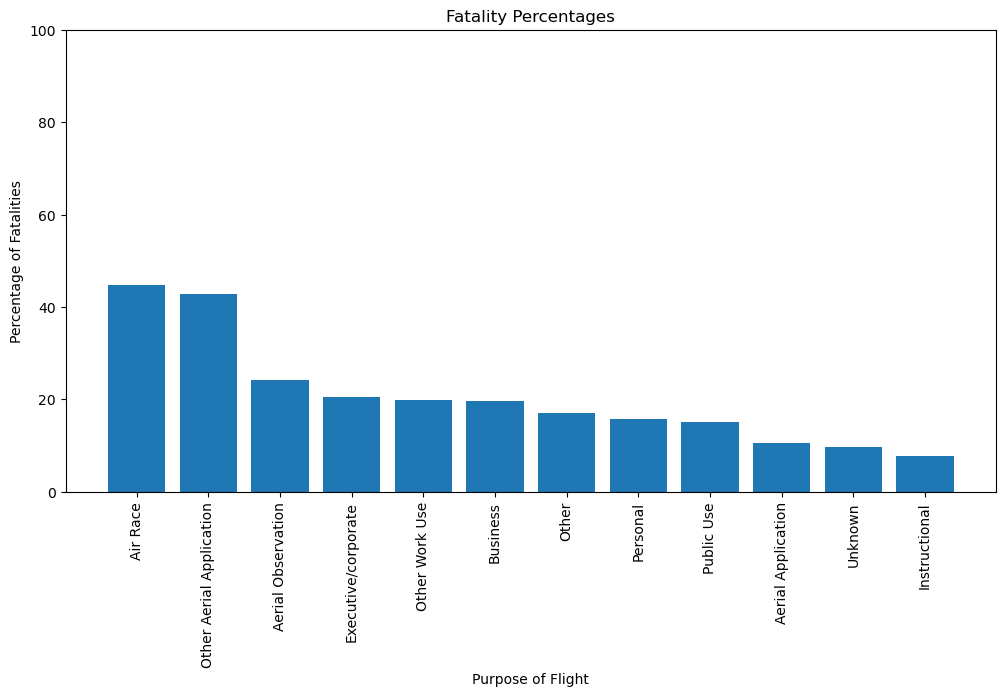

In [96]:
#We plot the sorted list of dictionaries.
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('Purpose of Flight')
ax.set_ylabel('Percentage of Fatalities')
ax.set_title('Fatality Percentages')
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 100)
ax.bar(list(sorted_dict.keys()), list(sorted_dict.values()));

In the U.S., we see that Air Race and Other Aerial Applications (includes public health spraying & firefighting) are the purpose of flights with most fatalities when accidents/incidents occur. It seems better to avoid these activities given the riskiness.

We would look to improve our analysis by look at the injury rates by purpose of flight

# Lets Compare Certain 'Makes' to these percentages

In [97]:
#Lets look at the 'Makes' column
#We notice alot of these 'Makes' are the same but just either spelled different
#or have spaces etc.
df['Make'].value_counts().head(30)

Make
CESSNA                      4246
PIPER                       2484
Cessna                      2108
Piper                       1094
BEECH                        885
Beech                        369
BOEING                       288
AIR TRACTOR INC              216
MOONEY                       216
CIRRUS DESIGN CORP           200
BELLANCA                     156
AERONCA                      148
MAULE                        137
Air Tractor                  117
Mooney                       116
LUSCOMBE                      94
STINSON                       91
Boeing                        89
DEHAVILLAND                   88
CHAMPION                      87
NORTH AMERICAN                76
DIAMOND AIRCRAFT IND INC      73
AVIAT AIRCRAFT INC            72
Maule                         69
Champion                      66
GRUMMAN                       65
AERO COMMANDER                64
Grumman                       64
TAYLORCRAFT                   60
EMBRAER                       59
Name:

In [98]:
#We first notice that all the 'Makes" aren't capitalized 
#We turn each make into all caps
df['Make'] = df['Make'].str.upper()

In [99]:
#We now can map each 'Make' name with its respective name.
df['Make'] = df['Make'].map(lambda x: 'CESSNA' if isinstance(x, str) and 'CESSNA' in x else x)
df['Make'] = df['Make'].map(lambda x: 'AIR TRACTOR' if isinstance(x, str) and 'AIR TRACTOR' in x else x)
df['Make'] = df['Make'].map(lambda x: 'GRUMMAN' if isinstance(x, str) and 'GRUMMAN' in x else x)
df['Make'] = df['Make'].map(lambda x: 'PIPER' if isinstance(x, str) and 'PIPER' in x else x)
df['Make'] = df['Make'].map(lambda x: 'BEECH' if isinstance(x, str) and 'BEECH' in x else x)
df['Make'] = df['Make'].map(lambda x: 'DIAMOND' if isinstance(x, str) and 'DIAMOND' in x else x)
df['Make'] = df['Make'].map(lambda x: 'AYRES' if isinstance(x, str) and 'AYRES' in x else x)
df['Make'] = df['Make'].map(lambda x: 'CIRRUS' if isinstance(x, str) and 'CIRRUS' in x else x)
df['Make'] = df['Make'].map(lambda x: 'BELLANCA' if isinstance(x, str) and 'BELLANCA' in x else x)
df['Make'] = df['Make'].map(lambda x: 'ROCKWELL' if isinstance(x, str) and 'ROCKWELL' in x else x)
df['Make'] = df['Make'].map(lambda x: 'AERO' if isinstance(x, str) and 'AERO' in x else x)
df['Make'] = df['Make'].map(lambda x: 'AERONCA' if isinstance(x, str) and 'AERONCA' in x else x)
df['Make'] = df['Make'].map(lambda x: 'MOONEY' if isinstance(x, str) and 'MOONEY' in x else x)
df['Make'] = df['Make'].map(lambda x: 'DEHAVILLAND' if isinstance(x, str) and 'DEHAVILLAND' in x else x)
df['Make'] = df['Make'].map(lambda x: 'BOEING' if isinstance(x, str) and 'BOEING' in x else x)
df['Make'] = df['Make'].map(lambda x: 'CHAMPION' if isinstance(x, str) and 'CHAMPION' in x else x)
df['Make'] = df['Make'].map(lambda x: 'SCHWEIZER' if isinstance(x, str) and 'SCHWEIZER' in x else x)
df['Make'] = df['Make'].map(lambda x: 'DEHAVILLAND' if isinstance(x, str) and 'DE HAVILLAND' in x else x)
df['Make'] = df['Make'].map(lambda x: 'WEATHERLY' if isinstance(x, str) and 'WEATHERLY' in x else x)
df['Make'] = df['Make'].map(lambda x: 'NORTH AMERICAN' if isinstance(x, str) and 'NORTH AMERICAN' in x else x)
df['Make'] = df['Make'].map(lambda x: 'WSK' if isinstance(x, str) and 'WSK' in x else x)
df['Make'] = df['Make'].map(lambda x: 'RAYTHEON' if isinstance(x, str) and 'RAYTHEON' in x else x)

In [100]:
#Now the top 'Makes' are all in their respective names
df['Make'].value_counts().head(25)

Make
CESSNA                6387
PIPER                 3623
BEECH                 1302
AERO                   536
AIR TRACTOR            395
BOEING                 385
MOONEY                 378
CIRRUS                 329
GRUMMAN                292
CHAMPION               224
BELLANCA               215
MAULE                  206
DEHAVILLAND            146
LUSCOMBE               139
DIAMOND                135
STINSON                129
NORTH AMERICAN         106
ROCKWELL                93
TAYLORCRAFT             91
AYRES                   82
EMBRAER                 78
AVIAT AIRCRAFT INC      76
RAYTHEON                75
AIRBUS                  73
AVIAT                   68
Name: count, dtype: int64

In [101]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    15038
Fatal         2574
Minor          137
Serious         94
Unknown         68
Incident        40
Name: count, dtype: int64

In [102]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident    17543
Incident      408
Name: count, dtype: int64

Lets look at these makes compared to fatality percentages.

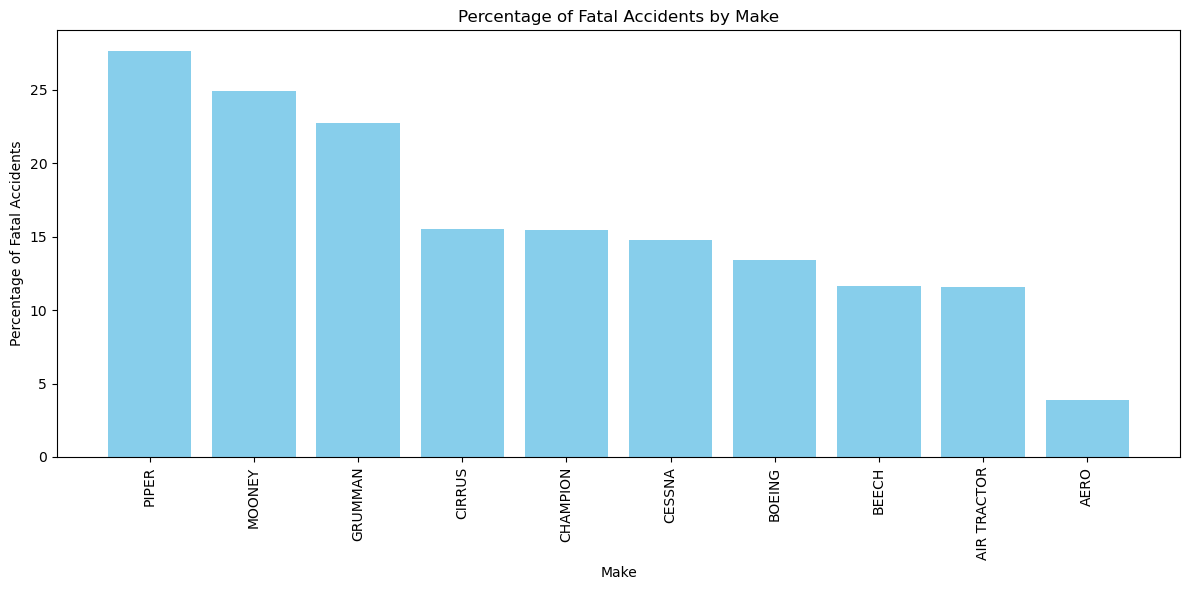

In [103]:
#We get the top 10 'Make' 
top_10_make = df['Make'].value_counts().head(10).index.tolist()

#We first create a lists to store make names and corresponding fatal percentages
makes = []
fatal_percentages = []

#We creat a for loop that iterate over each make in the DataFrame
for make in top_10_make:
    #Filtered the DataFrame for the specific make
    df_make = df[df['Make'] == make]
    
    #Count the total number of accidents for the make
    total_accidents = len(df_make)
    
    #Count the number of fatal accidents for the make
    fatal_accidents = len(df_make[df_make['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_accidents > 0:
        fatal_percentage = (fatal_accidents / total_accidents) * 100
    else:
        fatal_percentage = 0
    
    #Append make name and fatal percentage to lists
    makes.append(make)
    fatal_percentages.append(fatal_percentage)

makes.sort(reverse=True)
fatal_percentages.sort(reverse=True)

#We plot the relationship between 'Make' and 'POF_fatal_percentage'
plt.figure(figsize=(12, 6))
plt.bar(makes, fatal_percentages, color='skyblue')


plt.xlabel('Make')
plt.ylabel('Percentage of Fatal Accidents')
plt.title('Percentage of Fatal Accidents by Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We see that PIPER has the highest percentage of fatalities with their aircrafts.

# Categorizing the Location States and Island Into U.S regions

In [104]:
#We create a new column to put each state into regions
df['us_regions'] = df['Location_State_Country']

In [105]:
#We made a function that will combine specific objects inside the column. 
def usregions(df, replace_value, original_value):
    df['us_regions'] = df['us_regions'].map(lambda x: replace_value if isinstance(x, str) and original_value in x else x)
    return df['us_regions']

In [106]:
#We create a dictionary containing each state as the key and its region as the the value. 
us_regions_dict = {'NY':'Northeast','PA':'Northeast','NJ':'Northeast','MA':'Northeast','ME':'Northeast','CT':'Northeast','NH':'Northeast','VT':'Northeast','RI':'Northeast',
                   'IL':'Midwest','MI':'Midwest','OH':'Midwest','MO':'Midwest','WI':'Midwest','MN':'Midwest','IN':'Midwest','KS':'Midwest','IA':'Midwest','NE':'Midwest','ND':'Midwest','SD':'Midwest',
                    'TX':'South','FL':'South','GA':'South','NC':'South','VA':'South','AR':'South','TN':'South','OK':'South','AL':'South','SC':'South','LA':'South','MD':'South','KY':'South','WV':'South','DE':'South','DC':'South','MS':'South',
                    'CA':'West','AK':'West','AZ':'West','CO':'West','WA':'West','ID':'West','OR':'West','UT':'West','NV':'West','NM':'West','WY':'West','HI':'West','MT':'West',
                    'PR':'UST','Ocean':'UST','AO':'UST','OF':'UST','PO':'UST','GU':'UST','VI':'UST','SAN JUAN IS.':'UST','GM':'UST','MG':'UST'}
len(us_regions_dict)

61

In [107]:
#We made a for loop that will loop the keys and values in our dictionary with the function we created.
for key, value in us_regions_dict.items():
    usregions(df, value, key)

In [108]:
df['us_regions'].value_counts()

us_regions
West         6884
South        6185
Midwest      3198
Northeast    1560
UST           124
Name: count, dtype: int64

# Catergorizing Purpose of Flight to Commercial or Private

In [109]:
#We made a function that will combine specific objects inside the column.
def compriv(df, replace_value, original_value):
    df['Commercial_vs_Private'] = df['Commercial_vs_Private'].map(lambda x: replace_value if isinstance(x, str) and original_value in x else x)
    return df['Commercial_vs_Private']



In [110]:
#We create a dictionary containing each Purpose as the key and either Commercial or Private as the the value.
compriv_dict = {'Personal': 'Commercial',
                'Instructional': 'Private',
                'Aerial Application': 'Private',
                'Business': 'Commercial',
                 'Other Work Use': 'Private',
                'Aerial Observation': 'Private',
                'Public Use': 'Private',
                'Executive/corporate': 'Private',
                'Air Race': 'Private',
                'Other Aerial Application': 'Private',
                'Unknown': 'Unknown',
                'Other': 'Private'}

compriv_dict

{'Personal': 'Commercial',
 'Instructional': 'Private',
 'Aerial Application': 'Private',
 'Business': 'Commercial',
 'Other Work Use': 'Private',
 'Aerial Observation': 'Private',
 'Public Use': 'Private',
 'Executive/corporate': 'Private',
 'Air Race': 'Private',
 'Other Aerial Application': 'Private',
 'Unknown': 'Unknown',
 'Other': 'Private'}

In [111]:
#We create a new column.
df['Commercial_vs_Private'] = df['Purpose.of.flight']

In [112]:
#We made a for loop that will loop the keys and values in our dictionary with the function we created.
for key, value in compriv_dict.items():
    compriv(df, value, key)

We have now combined each state to its respective U.S region and also combined each purpose of flight to Commercial or Private.

We will use the Commercial_vs_Private for our level 1 and 2 Analysis.

We will now save our cleaned data.

In [113]:
df.to_csv('./data/Aviation_Data_Cleaned.csv')

# Level 1 Analysis 

In [114]:
df['Commercial_vs_Private'].value_counts()

Commercial_vs_Private
Commercial    11804
Private        4912
Unknown        1235
Name: count, dtype: int64

In [115]:
#We put the 'Commercial_vs_Private' column into a list.
Compriv_list = list(df['Commercial_vs_Private'].value_counts().index)

Compriv_list

['Commercial', 'Private', 'Unknown']

We can now look at commerical and private flights fatality percentages.

In [116]:
#We first create a lists to store the commercial and private fatal percentages.
Compriv_fatal_percentage = {}

#We iterate over each purpose of flight in the list
for compriv in Compriv_list:
    # Filter the DataFrame for the specific purpose of flight
    df_compriv = df[df['Commercial_vs_Private'] == compriv]
    
    #Count the total number of accidents for the purpose of flight
    total_accidents = len(df_compriv)
    
    #Count the number of fatal accidents for the purpose of flight
    fatal_accidents = len(df_compriv[df_compriv['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_accidents > 0:
        fatal_percentage = (fatal_accidents / total_accidents) * 100
    else:
        fatal_percentage = 0
    
    #Store the percentage in the dictionary
    Compriv_fatal_percentage[compriv] = fatal_percentage


Compriv_fatal_percentage

{'Commercial': 15.935276177566926,
 'Private': 11.644951140065146,
 'Unknown': 9.79757085020243}

Now we visualize these percentages.

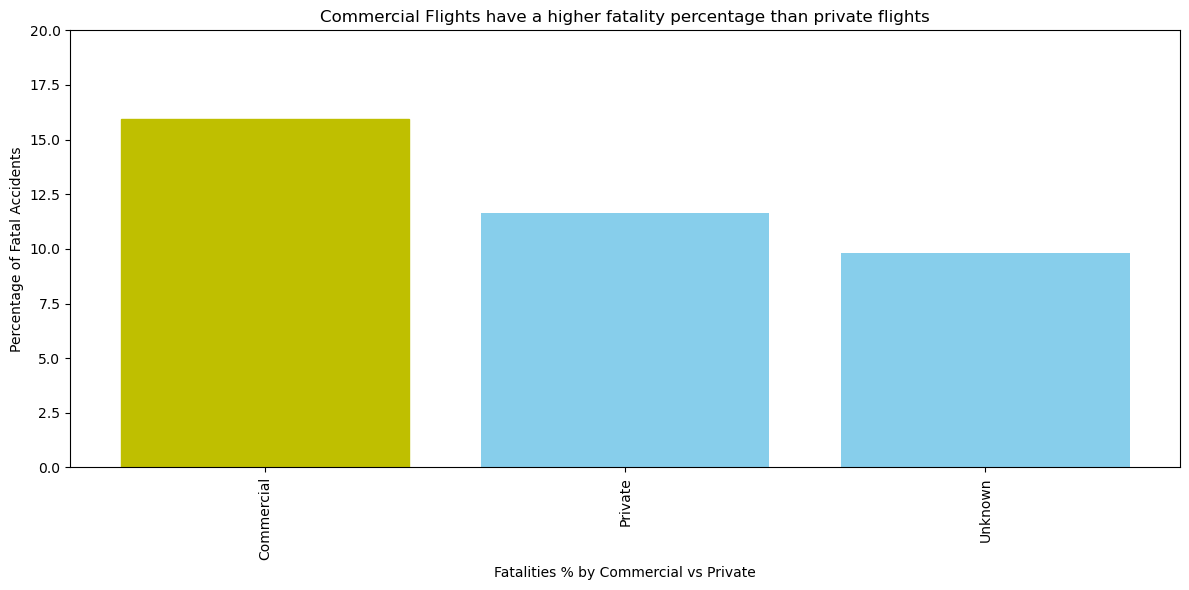

In [117]:
#We put these percentages into a list.
x = list(Compriv_fatal_percentage.keys())
y = list(Compriv_fatal_percentage.values())
        
#Plot the relationships between 'Compriv_fatal_percentage'
plt.figure(figsize=(12, 6))
barlist = plt.bar(x, y, color='skyblue')


plt.xlabel('Fatalities % by Commercial vs Private')
plt.ylabel('Percentage of Fatal Accidents')
plt.title('Commercial Flights have a higher fatality percentage than private flights')
plt.ylim(0, 20)
barlist[0].set_color('y')


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now that we have answered our first answer of determining commercial vs private. We determined that private is safer than commercial as such we will now look at the risk associated with private aircrafts. 

# Level 2 Analysis 

In [118]:
#We create a new dataframe that just shows us 'Private' flights.
df_private = df[df['Commercial_vs_Private'] == 'Private']

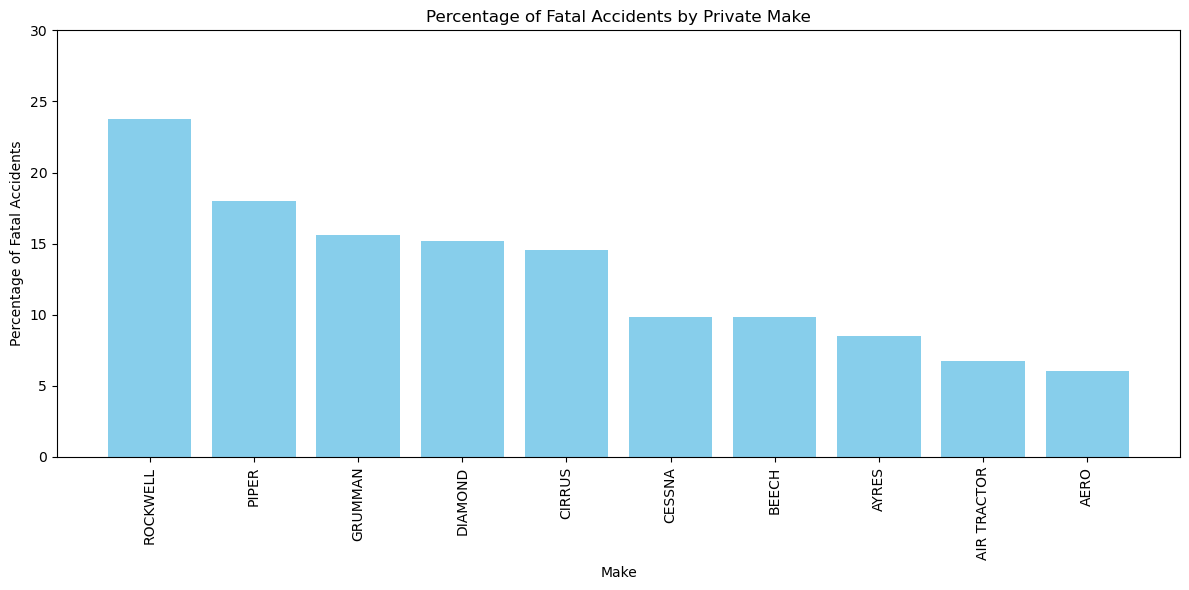

In [119]:
#We get the top 10 makes of private flights.
top10_private_make = df_private['Make'].value_counts().head(10).index.tolist()

#We create a lists to store make names and corresponding fatal percentages
top10_private_makes = []
fatal_private_percentages = []

#We create a for loop that iterate over each make in the DataFrame
for make in top10_private_make:
    #Filter the DataFrame for the specific make
    df_private_make = df_private[df_private['Make'] == make]
    
    #Count the total number of accidents for the make
    total_private_accidents = len(df_private_make)
    
    #Count the number of fatal accidents for the make
    fatal_private_accidents = len(df_private_make[df_private_make['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_private_accidents > 0:
        fatal_private_percentage = (fatal_private_accidents / total_private_accidents) * 100
    else:
        fatal_private_percentage = 0
    
    #Append make name and fatal percentage to lists
    top10_private_makes.append(make)
    fatal_private_percentages.append(fatal_private_percentage)

top10_private_makes.sort(reverse=True)
fatal_private_percentages.sort(reverse=True)

x = top10_private_makes
y = fatal_private_percentages


# Plot the relationship between 'top10_private_makes' and 'fatal_private_percentage'
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')


plt.xlabel('Make')
plt.ylabel('Percentage of Fatal Accidents')
plt.title('Percentage of Fatal Accidents by Private Make')
plt.ylim(0, 30)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

We have identified "Rockwell" and "Piper" are the top two aircraft makes to avoid but we do not feel comfortable with this analysis. To expand on our investigation, we will rerun the above analysis for Good and Bad Weather. 

# Using Good and Bad Weather to Determine the Safer Private flight Make

As we note IMC is considered bad weather and VMC is considered good weather.

In [120]:
#We made two dataframes for good and bad weather
df_private_IMC = df[df['Weather.Condition'] == 'IMC']
df_private_VMC = df[df['Weather.Condition'] == 'VMC']

We are going to start our level 2 analysis with good and bad weather.

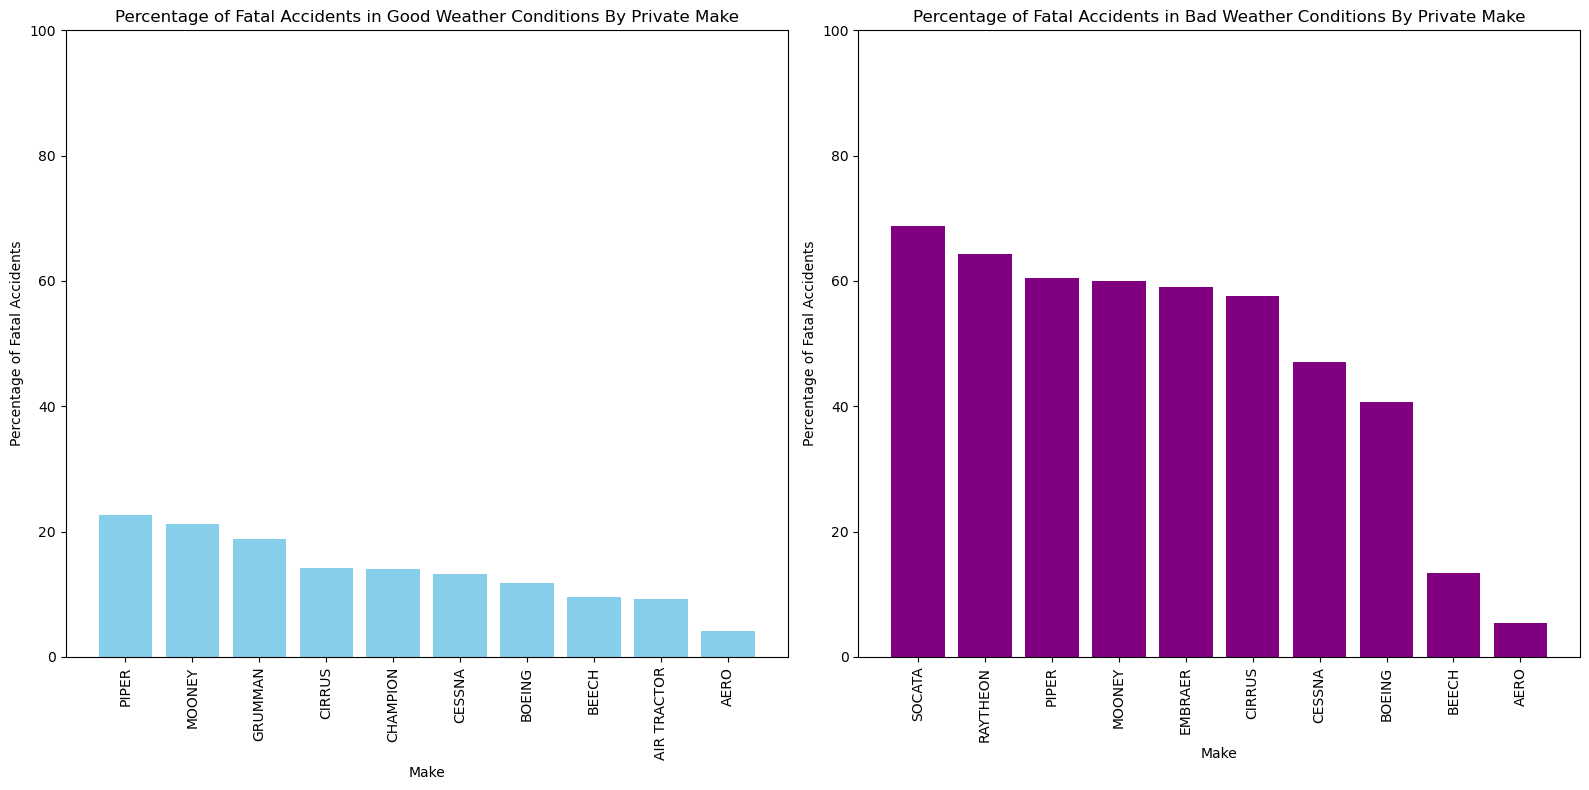

In [121]:
##This is for Good Weather


#We get the top 10 makes of private flights in good weather.
top10_private_make_VMC = df_private_VMC['Make'].value_counts().head(10).index.tolist()

#We create lists to store make names and corresponding fatal percentages
top10_private_makes_VMC = []
fatal_private_percentages_VMC = []

#We iterate over each make in the DataFrame
for make in top10_private_make_VMC:
    #Filter the DataFrame for the specific make in good weather
    df_private_make_VMC = df_private_VMC[df_private_VMC['Make'] == make]
    
    #Count the total number of accidents for the make in good weather
    total_private_accidents_VMC = len(df_private_make_VMC)
    
    #Count the number of fatal accidents for the make in good weather
    fatal_private_accidents_VMC = len(df_private_make_VMC[df_private_make_VMC['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_private_accidents_VMC > 0:
        fatal_private_percentage_VMC = (fatal_private_accidents_VMC / total_private_accidents_VMC) * 100
    else:
        fatal_private_percentage_VMC = 0
    
    #Append make name and fatal percentage to lists
    top10_private_makes_VMC.append(make)
    fatal_private_percentages_VMC.append(fatal_private_percentage_VMC)


#We sort them in greatest to least order
top10_private_makes_VMC.sort(reverse=True)
fatal_private_percentages_VMC.sort(reverse=True)

x = top10_private_makes_VMC
y = fatal_private_percentages_VMC

##This is for Bad Weather


#We get the top 10 makes of private flights in bad weather.
top10_private_make_IMC = df_private_IMC['Make'].value_counts().head(10).index.tolist()

#We create lists to store make names and corresponding fatal percentages
top10_private_makes_IMC = []
fatal_private_percentages_IMC = []

#We terate over each make in the DataFrame
for make in top10_private_make_IMC:
    #Filter the DataFrame for the specific make in bad weather
    df_private_make_IMC = df_private_IMC[df_private_IMC['Make'] == make]
    
    #Count the total number of accidents for the make in bad weather
    total_private_accidents_IMC = len(df_private_make_IMC)
    
    #Count the number of fatal accidents for the make in bad weather
    fatal_private_accidents_IMC = len(df_private_make_IMC[df_private_make_IMC['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_private_accidents_IMC > 0:
        fatal_private_percentage_IMC = (fatal_private_accidents_IMC / total_private_accidents_IMC) * 100
    else:
        fatal_private_percentage_IMC = 0
    
    #Append make name and fatal percentage to lists
    top10_private_makes_IMC.append(make)
    fatal_private_percentages_IMC.append(fatal_private_percentage_IMC)

#We sort them in greatest to least order
top10_private_makes_IMC.sort(reverse=True)
fatal_private_percentages_IMC.sort(reverse=True)


x1 = top10_private_makes_IMC
y1 = fatal_private_percentages_IMC


fig, axes= plt.subplots(figsize=(16, 8), ncols=2)
axes[0].bar(x, y, color='skyblue')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Percentage of Fatal Accidents')
axes[0].set_title('Percentage of Fatal Accidents in Good Weather Conditions By Private Make')

axes[0].set_ylim(0,100)
axes[0].tick_params(axis='x', rotation=90)


axes[1].bar(x1, y1, color='purple')
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Percentage of Fatal Accidents')
axes[1].set_title('Percentage of Fatal Accidents in Bad Weather Conditions By Private Make')

axes[1].set_ylim(0,100)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()


Upon furthur level 2 analysis, we have discoverd that "PIPER" does not perform well in either good or bad weather. We would perfer Jelly Bean Airline to consider investing in "Aero" and "Beech" planes.

# Level 3 Analysis 

We will now look at the regions with the highest fatality percentages using private flights.

In [122]:
#We put the us_regions column into a list.
us_regions_list = list(df['us_regions'].value_counts().index)

us_regions_list

['West', 'South', 'Midwest', 'Northeast', 'UST']

In [123]:
#We first create a lists to store the U.S regions and fatal percentages.
us_regions_fatal_percentage = {}

#We iterate over each region in the list
for region in us_regions_list:
    #Filter the DataFrame for the specific region
    df_us_regions = df[df['us_regions'] == region]
    
    #Count the total number of accidents for the region
    total_us_region_accidents = len(df_us_regions)
    
    #Count the number of fatal accidents for the region
    fatal_us_region_accidents = len(df_us_regions[df_us_regions['Injury.Severity'] == 'Fatal'])
    
    #Calculate the percentage of fatal accidents
    if total_us_region_accidents > 0:
        fatal_us_region_percentage = (fatal_us_region_accidents / total_us_region_accidents) * 100
    else:
        fatal_us_region_percentage = 0
    
    #Store the percentage in the dictionary
    us_regions_fatal_percentage[region] = fatal_us_region_percentage


us_regions_fatal_percentage

{'West': 13.291690877396862,
 'South': 15.828617623282135,
 'Midwest': 13.570981863664791,
 'Northeast': 13.397435897435898,
 'UST': 29.838709677419356}

In [124]:
#We now put the percentages into a list from greatest to least.
sorted_us_regions_list = sorted(us_regions_fatal_percentage.items(), key=lambda x: x[1], reverse=True)


#We stored that list into a dictionary 
sorted_us_regions_dict = dict(sorted_us_regions_list)

Now we can visualize these percentages.

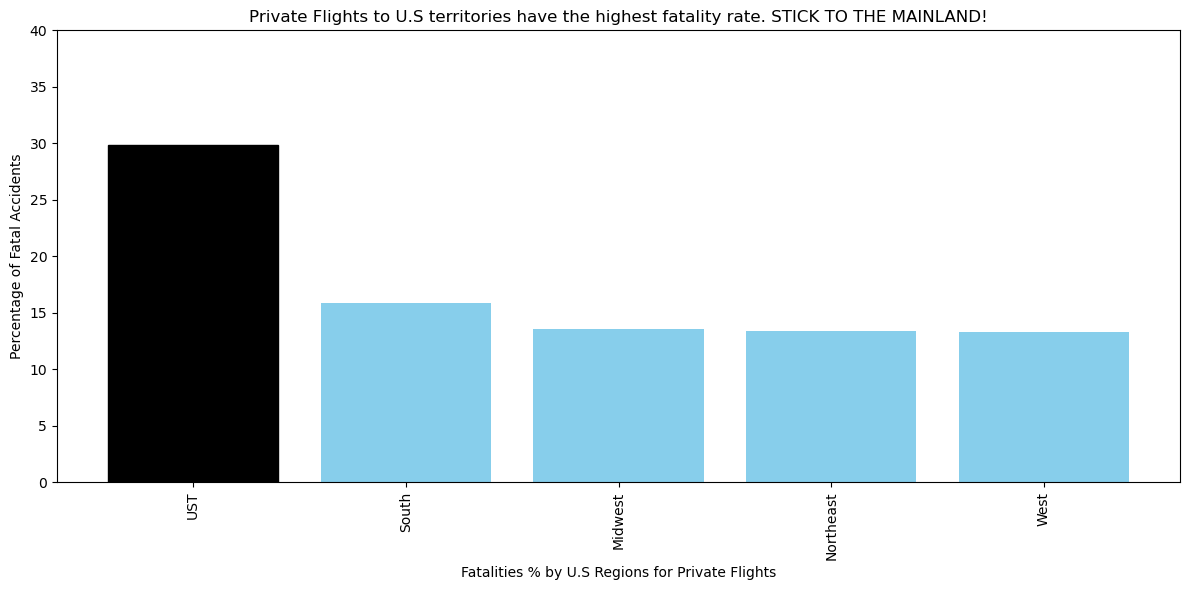

In [125]:

x = list(sorted_us_regions_dict.keys())
y = list(sorted_us_regions_dict.values())
        
#Plot the relationship between 'us_regions' and 'fatal_percentage'
plt.figure(figsize=(12, 6))
barlist = plt.bar(x, y, color='skyblue')


plt.xlabel('Fatalities % by U.S Regions for Private Flights')
plt.ylabel('Percentage of Fatal Accidents')
plt.title('Private Flights to U.S territories have the highest fatality rate. STICK TO THE MAINLAND!')
plt.ylim(0, 40)
barlist[0].set_color('black')


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Summary 

We have concluded that Jelly Bean Airlines shoud invest into planes made by "Beech" and "Aero" companies. These two companies have the lowest fatality percentages by Private planes and also lowest fatality percentages in good and bad weather conditions. 